<a href="https://colab.research.google.com/github/Mahahalin/Batch-11/blob/main/air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.995
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.98        30
           2       1.00      1.00      1.00        45
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        54

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      1.00       200



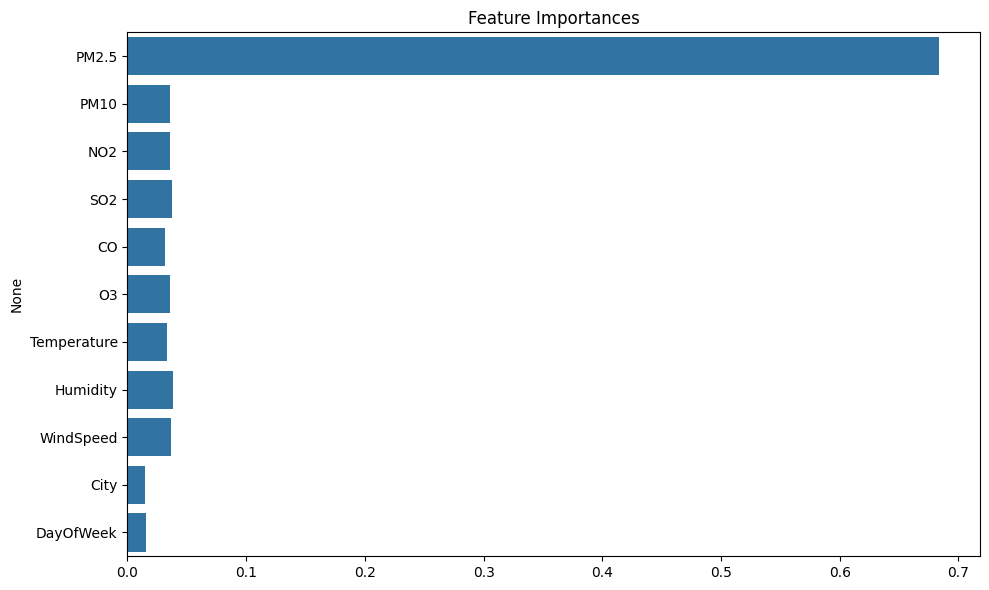

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('synthetic_air_quality_dataset.csv')

# Encode categorical columns
label_encoders = {}
for col in ['City', 'DayOfWeek', 'AQI_Level']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.drop(columns=['AQI_Level'])
y = df['AQI_Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance plot
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')
plt.tight_layout()
plt.savefig('feature_importances_plot.png')
plt.show()
